## Построение модели Линейной регрессии

Данные о жилищных условиях и ценах на жилье в Калифорнии (California housing dataset)

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing

In [3]:
# Извлечем набор данных о жилье в Калифорнии в виде фрейма данных pandas
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
# Вывод размера выборки
df.shape

(20640, 9)

20640 строк,
9 столбцов:
*   MedInc (Средний доход домохозяйства в блоке)
*   HouseAge (Средний возраст домов в блоке)
*   AveRooms (Среднее количество комнат в доме)
*   AveBedrms (Среднее количество спален в доме)
*   Population (Население блока)
*   AveOccup (Среднее количество людей, проживающих в доме)
*   Latitude (Широта)
*   Longitude (Долгота)
*   MedHouseVal (Средняя стоимость дома в блоке)



In [10]:
# Проверка на пропущенные значения
print("\nПропущенные значения:\n", df.isnull().sum())


Пропущенные значения:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [20]:
# Статистический анализ числовых переменных
print("\nОписательная статистика:\n", df.describe().round(2))


Описательная статистика:
          MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44       1.01      787.00      2.43   
50%        3.53     29.00      5.23       1.05     1166.00      2.82   
75%        4.74     37.00      6.05       1.10     1725.00      3.28   
max       15.00     52.00    141.91      34.07    35682.00   1243.33   

       Latitude  Longitude  MedHouseVal  
count  20640.00   20640.00     20640.00  
mean      35.63    -119.57         2.07  
std        2.14       2.00         1.15  
min       32.54    -124.35         0.15  
25%       33.93    -121.80         1.20  
50%       34.26    -118.49         1.80  
75%       37.71    -118.01    

Данные показывают большое разнообразие в характеристиках районов Калифорнии, с большим разбросом в доходах, возрасте домов, размерах домов и населении. Некоторые значения (например, максимальное количество комнат и жильцов на дом) кажутся выбросами и требуют дополнительного изучения. Данные охватывают большую часть территории Калифорнии, как по широте, так и по долготе. Цены на жилье в Калифорнии варьируются в широком диапазоне, с большим количеством относительно недорогих домов и меньшим количеством очень дорогих домов.

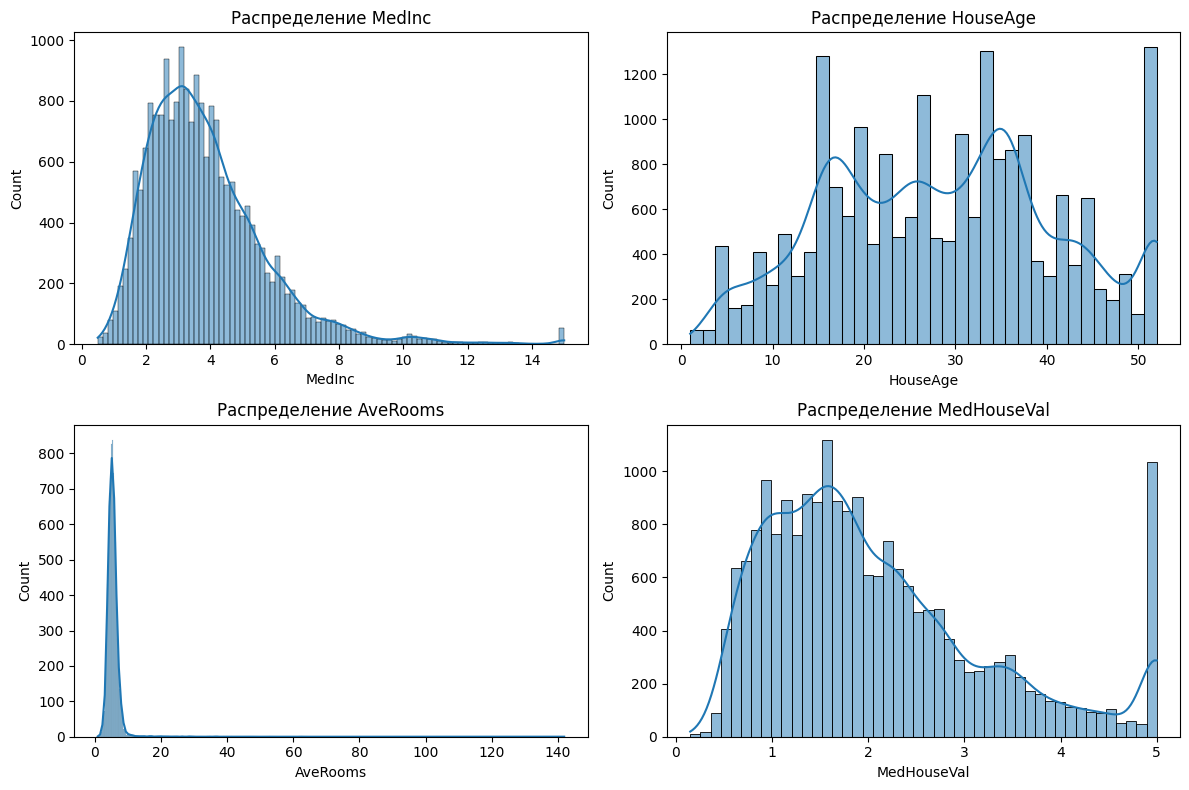

In [13]:
# Выбираем переменные для визуализации
variables = ['MedInc', 'HouseAge', 'AveRooms', 'MedHouseVal']

# Строим гистограммы распределений
plt.figure(figsize=(12, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Распределение {var}')
plt.tight_layout()
plt.show()

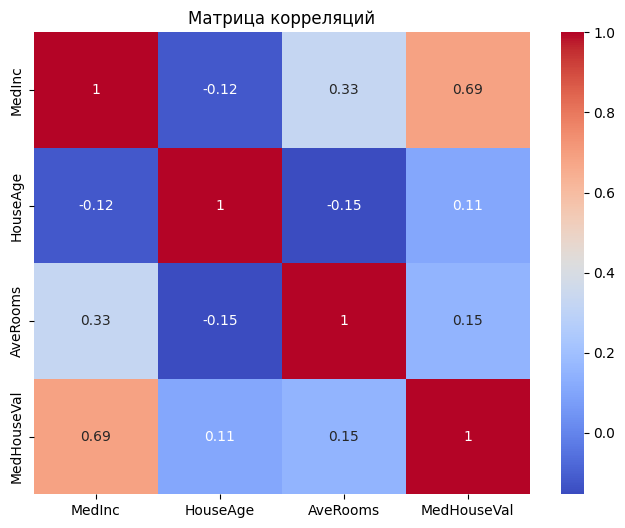

In [14]:
# Строим матрицу корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(df[variables].corr(), annot=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

Коэффициент корреляции 0.69 между MedInc и MedHouseVal означает, что существует сильная положительная линейная связь между этими двумя переменными.

Чем выше средний доход домохозяйств в блоке, тем выше средняя стоимость домов в этом блоке.
Чем ниже средний доход домохозяйств, тем ниже, средняя стоимость домов.
В районах с более высоким доходом люди могут позволить себе покупать более дорогие дома, что в свою очередь повышает среднюю стоимость жилья в этих районах.
Коэффициент корреляции измеряет только линейную связь. Если связь между переменными нелинейная, коэффициент корреляции может не отражать ее силу.


In [7]:
# Разделение данных на обучающий и тестовый набор
X = df[['MedInc', 'AveRooms']]
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обоснование выбора переменных:
MedInc (Средний доход домохозяйства в блоке) выбран, так как он имеет сильную положительную корреляцию с целевой переменной MedHouseVal (Средняя стоимость дома в блоке).
AveRooms (Среднее количество комнат в доме) выбран как дополнительный параметр, который может также влиять на стоимость жилья.


In [8]:
# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Обучающая выборка
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
print(f'MSE: {mean_squared_error(y_train, y_train_pred)},\
\nMAE :{mean_absolute_error( y_train, y_train_pred)},\
\n R2: {r2_score(y_train, y_train_pred)}')

MSE: 0.690985965844761,
MAE :0.61753104121913,
 R2: 0.4830960291312655


Значение MSE = 0.69, указывает на то, что модель не очень точно предсказывает значения. Чем меньше значение MSE, тем точнее модель предсказывает значения.
2. MAE - измеряет среднее значение абсолютных значений разницы между фактическими значениями и предсказанными значениями (0.61), означает, что в среднем модель делает ошибку на 0.61 ед.
3. R² = 0.48, означает, что модель может объяснить только около 48% изменений целевой переменной (чуть меньше половины).
Значения, близкие к 0, указывают на плохую точность модели.

Модель пока не очень точная: MSE и MAE сравнительно большие, а R² невелик.
Необходимо улучшить модель.

In [10]:
# Предсказания на тестовом наборе
y_test_pred = lr.predict(X_test)
print(f'MSE: {mean_squared_error( y_test, y_test_pred)},\
\nMAE :{mean_absolute_error( y_test, y_test_pred)},\
\n R2: {r2_score(y_test, y_test_pred)}')

MSE: 0.7021550469058006,
MAE :0.624682807713972,
 R2: 0.4641710652437856


Среднеквадратичная ошибка, средняя абсолютная чуть выше, коэффициент детерминации - чуть ниже. Модель показывает четь менее точные значения в сравнении с обучающим набором.

В целом, результаты указывают на то, что модель линейной регрессии не обеспечивает высокого качества прогнозирования для представленных данных, так как R2 низкий как на обучающих, так и на тестовых данных. Это может говорить о том, что между предикторами и целевой переменной имеются нелинейные зависимости, или в данных недостаточно информации для обучения модели, или, возможно, потребуются более сложные модели для предсказания.